In [1]:
from Gaussian import Gaussian
from EM import EM
from NN import NN
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mp

def plot_DB(D, K, predict):
    if D != 2: return

    color = ("silver", "red", "blue", "seagreen", "cyan",
             "magenta", "orange", "purple", "pink")

    plt.rcParams["figure.dpi"] = 200
    fig, ax = plt.subplots()

    # plot the decision boundary
    x, y = np.meshgrid(np.linspace(-10, 10, 1000),
                       np.linspace(-10, 10, 1000))
    z = predict(np.c_[np.ravel(x), np.ravel(y)])
    z = np.argmax(z, axis=1).reshape(x.shape)
    ax.contourf(x, y, z, K - 1, alpha=0.15, colors=color)

    # set the legend
    legend = [mp.Patch(color=color[i], label="Gaussian_{}".format(i))
              for i in range(K)]
    legend[0] = mp.Patch(color=color[0], label="Background")
    plt.legend(handles=legend, fontsize=8)

    edge = 10
    plt.axis([-edge, edge, -edge, edge])
    plt.grid()
    plt.show()

In [2]:
D = 2     # dimension of sample data point
K = 3     # number of Gaussian / classifications

# parameters for neural networks
neuron_1     = {0: K}
neuron_2_10  = {0: 10, 1: K}
neuron_2_100 = {0: 100, 1: K}
act_func_1 = {0: NN.softmax}
act_func_2 = {0: NN.relu, 1: NN.softmax}

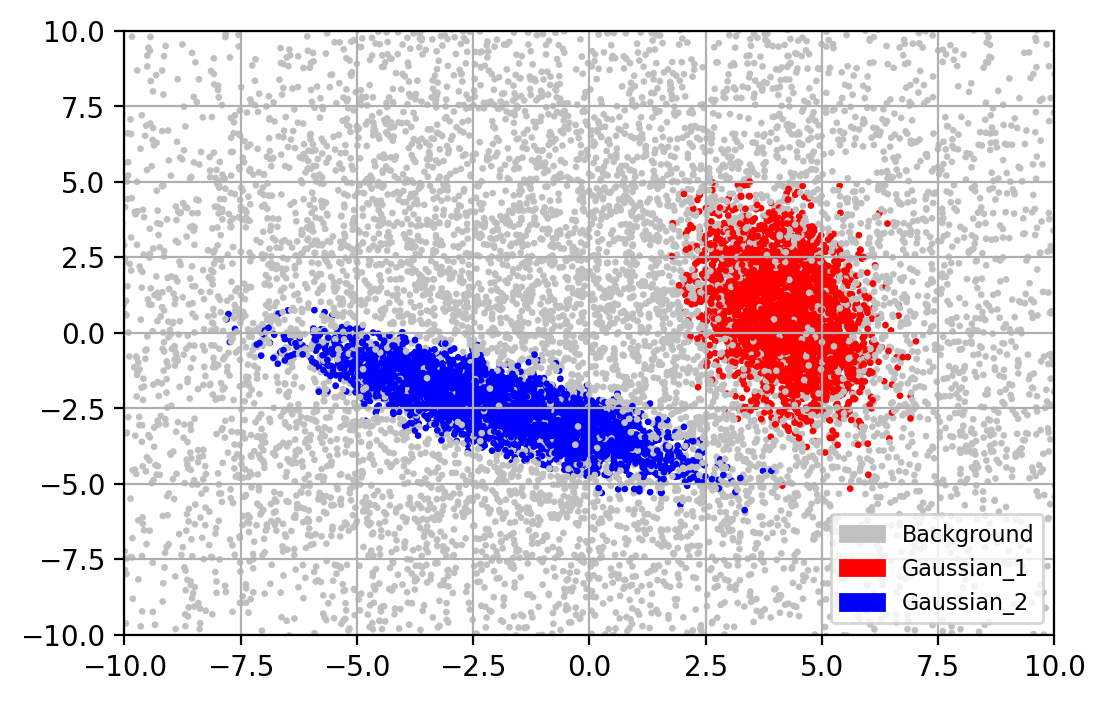

In [3]:
G = Gaussian(D=D, K=K)
G.plot_sample()

Expectation-maximization (EM)

91.8625  0.6154


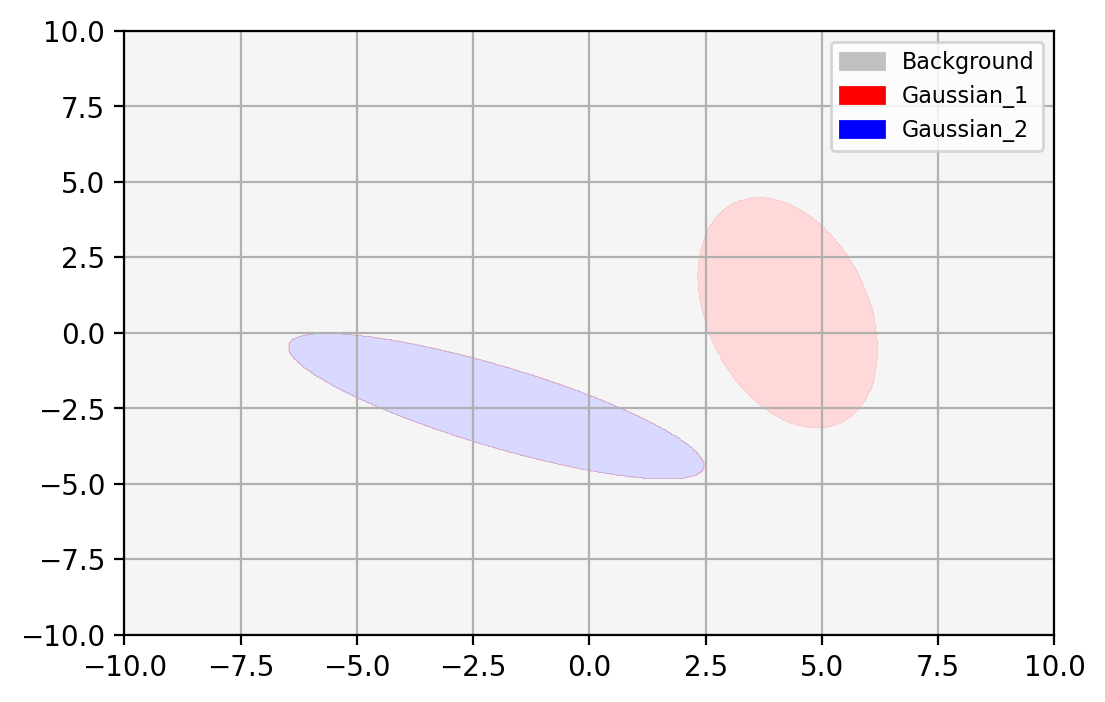

In [4]:
# train
method = EM(K)
method.train(G.train_point)
method.order_correction(G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
plot_DB(D, K, method.predict)

Quadratic Neural Network (2-3)

91.8525  16.2990


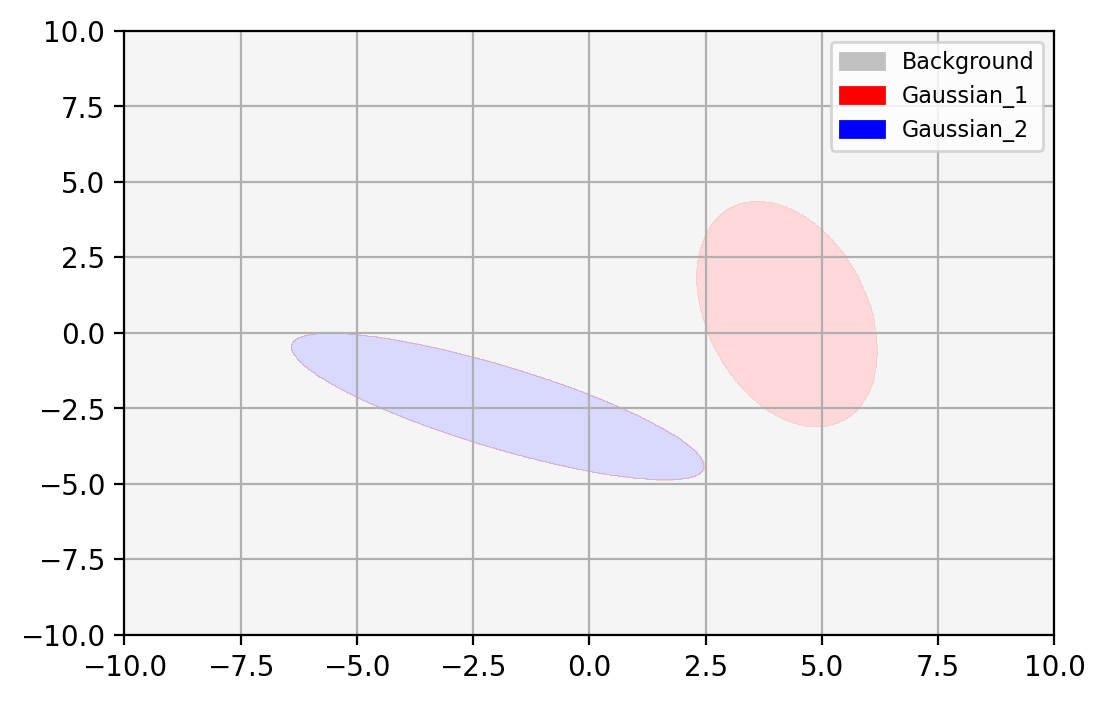

In [5]:
# train
method = NN(D, neuron_1, act_func_1, NN_type="QNN")
method.train(G.train_point, G.train_label, G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
plot_DB(D, K, method.predict)

# train process
a = method.valid_loss

Conventional Neural Network (2-3)

31.1752  2.4423


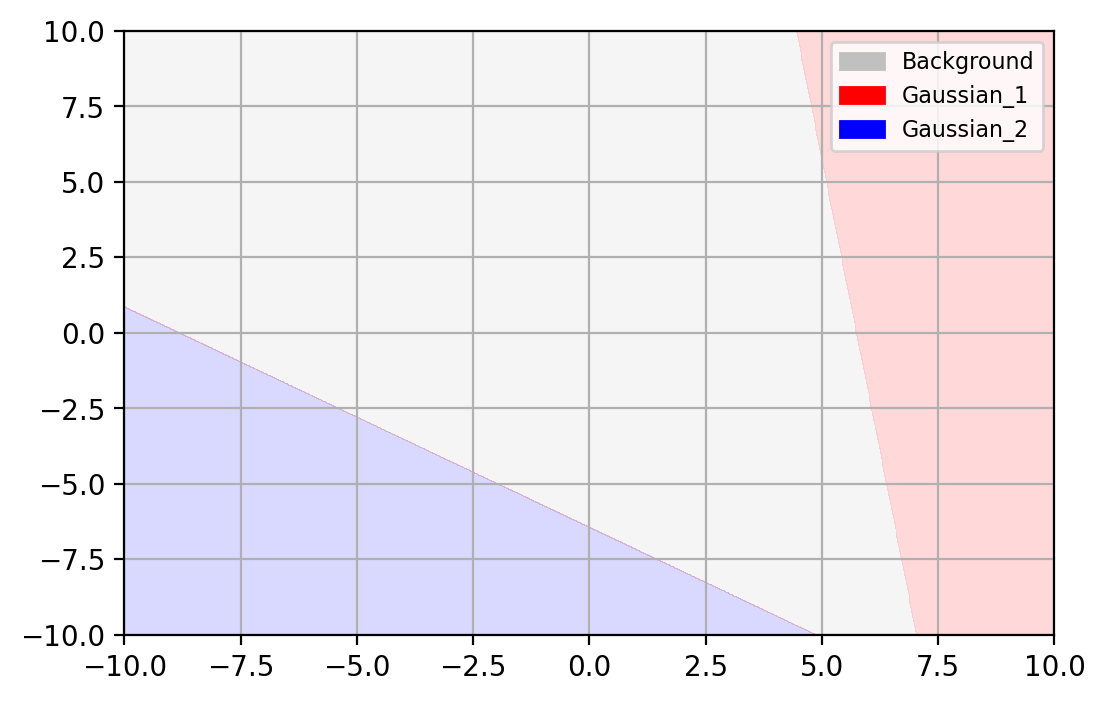

In [6]:
# train
method = NN(D, neuron_1, act_func_1, NN_type="LNN")
method.train(G.train_point, G.train_label, G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
plot_DB(D, K, method.predict)

# train process
b = method.valid_loss

Conventional Neural Network (2-10-3)

91.8122  23.1471


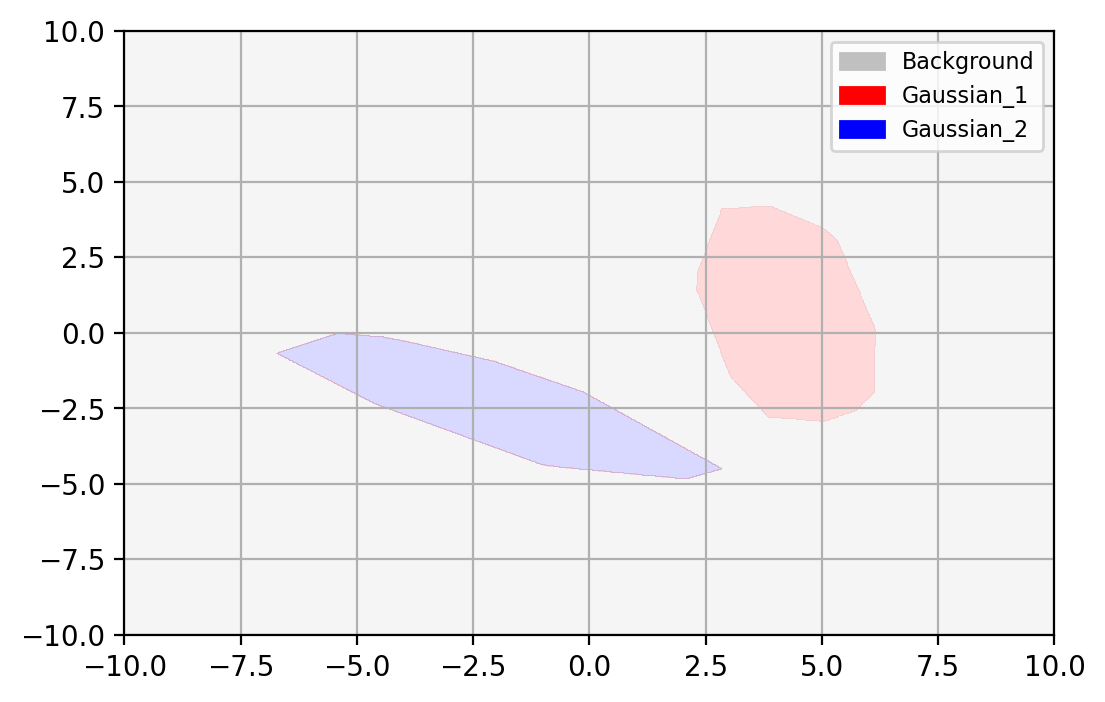

In [7]:
# train
method = NN(D, neuron_2_10, act_func_2, NN_type="LNN")
method.train(G.train_point, G.train_label, G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
plot_DB(D, K, method.predict)

# train process
c = method.valid_loss

Conventional Neural Network (2-100-3)

In [ ]:
# train
method = NN(D, neuron_2_100, act_func_2, NN_type="LNN")
method.train(G.train_point, G.train_label, G.valid_point, G.valid_label)

# result
accuracy = method.test(G.test_point, G.test_label)[0] * 100
time     = method.train_time
print("%02.04f  %02.4f" % (accuracy, time))

# decision boundary
plot_DB(D, K, method.predict)

# train process
d = method.valid_loss

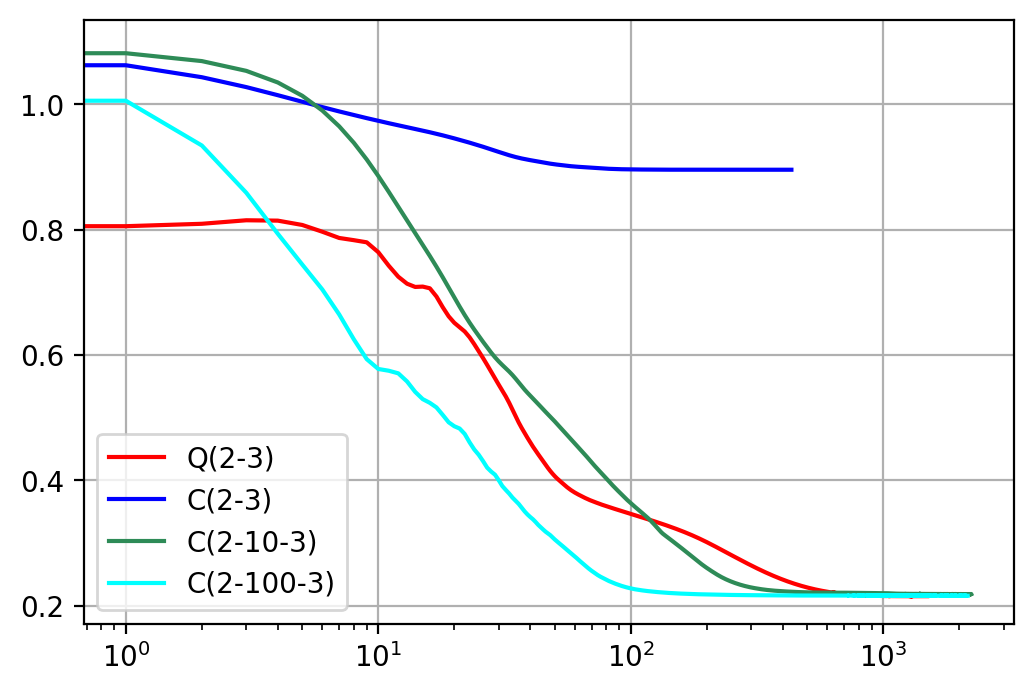

In [9]:
fig, ax = plt.subplots()
ax.plot(a, color = 'red',      label="Q(2-3)")
ax.plot(b, color = 'blue',     label="C(2-3)")
ax.plot(c, color = 'seagreen', label="C(2-10-3)")
ax.plot(d, color = 'cyan',     label="C(2-100-3)")
ax.set_xscale('log')
plt.legend()
plt.grid()
plt.show()